# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

In [4]:
data = pd.io.stata.read_stata('/Users/miloneythakrar/Desktop/data/data/us_job_market_discrimination.dta')

In [5]:
# number of callbacks for black-sounding names
sum(data[data.race=='w'].call)

235.0

In [6]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

In [7]:
data.shape

(4870, 65)

In [8]:
w = data[data.race=='w']
b = data[data.race=='b']

In [10]:
#find the number from each sample that recieved a call
wcall = w.call.sum()
bcall = b.call.sum()

#calculate the proportion of successes and faliures for each sample
wpr = wcall/len(w)
bpr = bcall/len(b)


#multiply proportions by n
nwpr = wpr*n
nbpr = bpr*n

#multiply 1-proportions by n
nwpr1 = (1-wpr)*n
nbpr1 = (1-wpr)*n


print('\t\tWhite', '\tBlack')
print ('n:\t\t',len(w),'\t', len(b))
print ('calls:\t\t', wcall,'\t', bcall)
print ('p-hat:\t\t',round(wpr,4),'', round(bpr,4))
print ('p-hat*n:\t',int(nwpr),'\t', int(nbpr))
print ('(1 - p-hat)*n:\t',int(nwpr1),'\t', int(nbpr1))

		White 	Black
n:		 2435 	 2435
calls:		 235.0 	 157.0
p-hat:		 0.0965  0.0645
p-hat*n:	 235 	 157
(1 - p-hat)*n:	 2200 	 2200


1. What test is appropriate for this problem? Does the CLT apply?

In order for the CLT to apply,the random, normal, and independent conditions are met.  We can assume the random condition is met because the problem states that identical resumes are randomly assigned to white-sounding and black-sounding names. The normal condition is met because the proportions of successes and failures multiplied by n are both over 10. The independent condition is met because the observations seems to be independent of each other and when sampling without replacement, the sample size is not more than 10 percent of the total population. Because we are comparing two samples of data and the sample is greater than 30, the most appropriate test would be the z test. 

2. What are the null and alternative hypotheses? 

In this case, the null hypothesis is that the number of callbacks for black-sounding names is equal to that of white-sounding names.  The alternative hypothesis would be that the number of callbacks for black-sounding names is significantly less than of that of white-sounding means or conversely, the number of callbacks for white-sounding names is significantly higher than that of black-sounding names. 

In [7]:
# Your solution to Q3 here

3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist 
statistical approaches.

We first use frequentist approaches to analyze the data. To calculate the margin of error, we need to first identify the critical z-test value, which is 1.96 for a 95% confidence level.  We multipy this critical z-test value by the standard error in order to calculate the margin of error. 

In [ ]:
https://github.com/Nhorning/EDA_racial_discrimination/blob/master/sliderule_dsi_inferential_statistics_exercise_2.ipynb

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

To calculate the 95% confidence interval, we need take the sample mean plus/minus 1.96 (critical z score value) multiplied the standard error. 

In [13]:
#First, we calculate the standard of error. 
SE = np.sqrt(((wpr*(1-wpr)))/n+((bpr*(1-bpr))/n))
print(SE)

0.0077833705866767544


In [14]:
#Then, we calculate the margin of error. 
ME = 1.96 * SE
print(ME)

0.015255406349886438


The margin of error is 0.0153 when rounded to 4 decimal places. The confidence interval is the difference of proportions plus or minus the margin of error: 0.032 +/- 0.153 = 0.0168, 0.0473. 

In [19]:
#Calculate confidence interval using sample difference of proportions + or - the margin of error
confint = [sdp-ME, sdp+ME]

#print results
print('Margin of error:',round(ME,4))
print('95% confidence:\t', round(confint[0],4),round(confint[1],4))

Margin of error: 0.0153
95% confidence:	 0.0168 0.0473


Next, we calculate the p-value by finding the area of a standard normal distribution that exists beyond the distance between the z score and the mean of the normal distribution. 

In [20]:
#find observed difference
sdp = wpr-bpr

#Calculate z
z = sdp/SE 
#Caluculate p 
p = stats.norm.sf(z)

print('z =', round(z, 2),'\np =',round(p, 7))

z = 4.12 
p = 1.93e-05


The z score calculated above is 4.12 and the calculated p-value isapproximately 0.0000193. According to the frequentist approach, There is an approximate 1.93/100,000 chance of a value as large as the sample difference in the proportion of callbacks for white sounding and black sounding names happening as a result of random sampling error. The null hypothesis is rejected.

We then use bootstrapping to calculate the margin of error, confidence interval, and p-value.

/Users/miloneythakrar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/miloneythakrar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/miloneythakrar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/miloneythakrar/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


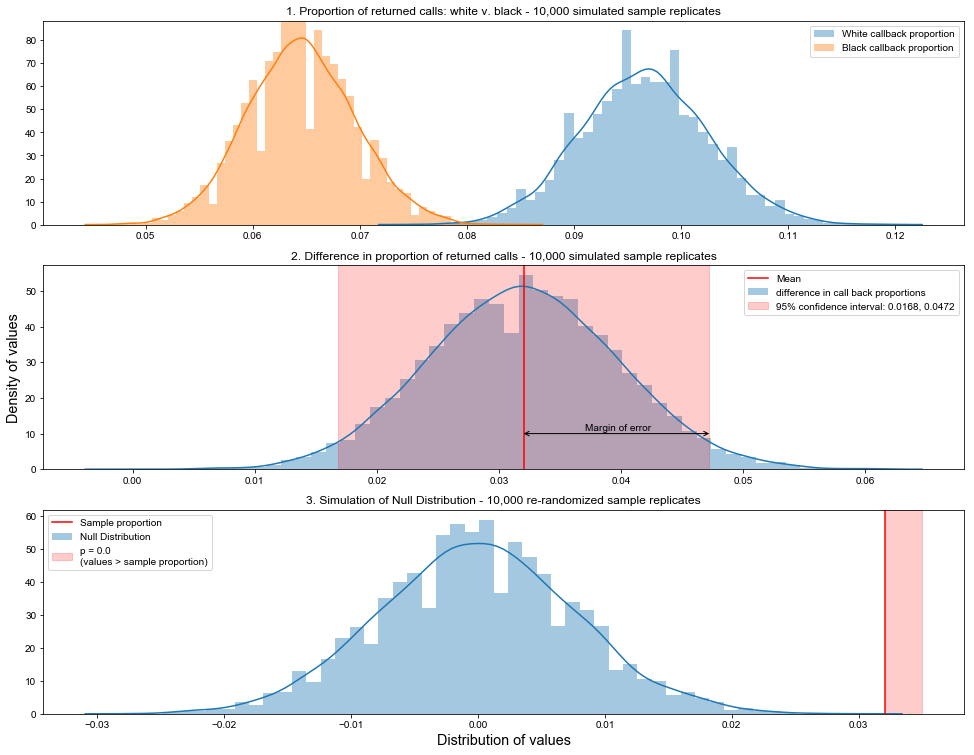

Sample difference in proportions:		 0.032
Bootstrapped mean difference in proportions:	 0.032
Bootstrapped margin of error:			 0.0152
Bootstrapped 95% confidence interval:		 0.0168, 0.0472
Bootstrapped p-value:				 0.0


In [21]:
#bootstrap sample function
def bs_sample(data, func, s_size, size=10000):
    #initialize array
    bs_s = np.empty(size)
    #start for loop for sample size 
    for i in range(size):
        #draw random sample (with replacement) sample size out of the dataset
        bs = np.random.choice(data, s_size)
        #run desired function on dataset
        out = func(bs)
        #save output of function to array
        bs_s[i] = out
    #return array
    return bs_s
        
#Function to calculate proportion of callbacks
def phat(data):
    
    #find n
    n = len(data)
    #find callbacks
    calls = data.sum()
    #find p-hat
    phat = calls/n
    return phat

#seed np.random for consistent results
np.random.seed(42)

#call functions to calculate bs of proportions
bs_pr_w = bs_sample(w.call, phat, len(w))
bs_pr_b = bs_sample(b.call, phat, len(b))

#find difference in proportions
bs_diffpr = bs_pr_w - bs_pr_b
#find mean difference
bs_diff_mu = np.mean(bs_diffpr)

#find observed difference
sdp = wpr-bpr

#find confidence interval of difference in proportions
diffconint = np.percentile(bs_diffpr, [2.5, 97.5])

#find proportionate interval
bs_diffpr

#find margin of error (bootstrapped)
bs_ME = diffconint[1] - bs_diff_mu

#arrange subplots
f, ax = plt.subplots(3, 1)

#plot distributions
sns.distplot(bs_pr_w, ax=ax[0], label='White callback proportion')
sns.distplot(bs_pr_b, ax=ax[0], label='Black callback proportion')
sns.distplot(bs_diffpr, ax=ax[1], label='difference in call back proportions')
conintstr = str(round(diffconint[0],4))+', '+str(round(diffconint[1],4))
ax[1].axvspan(diffconint[0], diffconint[1], color='r', alpha=.2, label = '95% confidence interval: '+conintstr)
ax[1].axvline(bs_diff_mu, color='r', label='Mean')
ax[1].annotate('', xy = (bs_diff_mu,10 ), \
    xytext = (diffconint[1], 10), fontsize = 11, \
    color = '#303030', arrowprops=dict(edgecolor='black', arrowstyle = '<->', shrinkA = 0, shrinkB = 0))
ax[1].text(bs_diff_mu+.005,11, 'Margin of error')
#ax[1].axvspan(bs_diff_mu, diffconint[1],  color='r', alpha=.4, label = 'Margin of Error')
ax[0].legend()
ax[1].legend()


#bootstrap p-value - reandomize the samples and compare to observed difference in proportions. 

#simulate null h
#Draw two bootstrap samples out of the data set with the length of the respective samples, and find the difference in proportions(n)
fakew = bs_sample(data.call, phat, n)
fakeb = bs_sample(data.call, phat, n)
nulldiff = fakew - fakeb

#find proportion of the null  >= than sample difference in proportions
bs_p = np.sum(nulldiff >= sdp)/len(nulldiff)
#print(bs_p)

#plot null distribution and p value
sns.distplot(nulldiff, ax=ax[2], label='Null Distribution')
ax[2].axvline(sdp, color='r', label='Sample proportion')

ax[2].axvspan(sdp, .035, color='r', alpha=.2, label='p = '+str(bs_p)+'\n(values > sample proportion)')
ax[2].legend()

#style, label and show plots
sns.set_style('darkgrid')
f.set_size_inches(16.5,12.75)
ax[0].set_title('1. Proportion of returned calls: white v. black - 10,000 simulated sample replicates')
ax[1].set_title('2. Difference in proportion of returned calls - 10,000 simulated sample replicates')
ax[2].set_title('3. Simulation of Null Distribution - 10,000 re-randomized sample replicates')
ax[2].set_xlabel('Distribution of values', fontsize='x-large')
ax[1].set_ylabel('Density of values', fontsize='x-large')


plt.show()

#print values
print('Sample difference in proportions:\t\t',round(sdp,4))
print('Bootstrapped mean difference in proportions:\t', round(bs_diff_mu,4))
print('Bootstrapped margin of error:\t\t\t', round(bs_ME,4))

print('Bootstrapped 95% confidence interval:\t\t',conintstr)
print('Bootstrapped p-value:\t\t\t\t', bs_p)

4. Write a story describing the statistical significance in the context of the original problem.

The sample dataset revealed that 235 

5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? 
If not, how would you amend your analysis?

Before determining if whether white- or black-sounding names are the most important factor for callback success, it helpful to conduct a Pearson correation test to determine how strongly other factors are correlated with callback success and how these factors compare to those of race/names. The Pearson correlation test results below show that black-sounding names are negatively correlated with callback success. However, it's important to point out that this correlation is not significant because the Pearson coefficient is less than -.30. In in comparison to other factors negatively correlated, black-sounding names is the most negatively correlated. In contrast, white-sounding names is the sixth highest factor positively correlated with callback success, indicating there is a difference in callback success between white-sounding and black-sounding names is significant. However, this Pearson coefficient for white-sounding names is less than .30, suggesting this correlation is not significant. Therefore, the perceived race of the applicant was not a significant factor in callback success. 

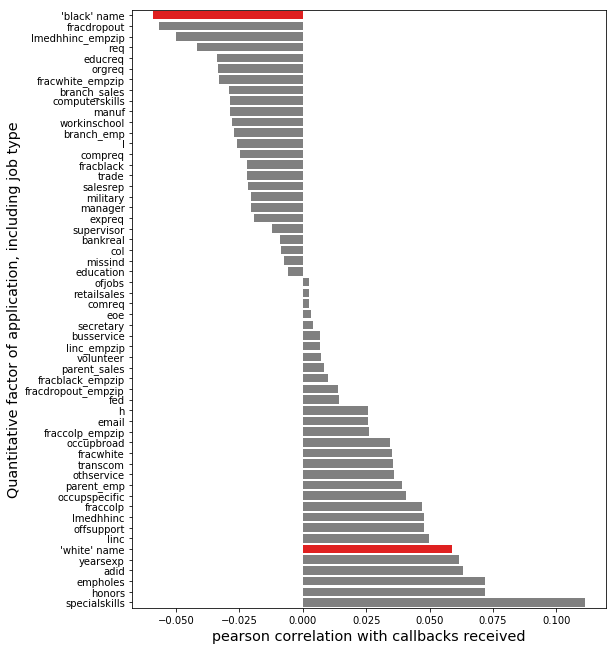

In [15]:
#Check what factors are most correlated with callbacks
datawb = data
datawb['\'white\' name'] = data.race == 'w'
datawb['\'black\' name'] = data.race=='b'

#create correlation matrix
corr = datawb.corr(method='pearson')
#narrow correlation matrix down to just calls
callcorr = corr['call']
#take 'calls' out because it will correlate with self 1:1
callcorr.drop('call', inplace=True)
#sort values
callcorr = callcorr.sort_values(ascending=True)

clrs = ['red' if (x == '\'white\' name' or x == '\'black\' name') else 'grey' for x in callcorr.index]
#plot all the correlations with call numbers
f, ax = plt.subplots(1,1)
sns.barplot(y=callcorr.index, x=callcorr, palette=clrs)
f.set_size_inches(8.5,11)
ax.set_xlabel('pearson correlation with callbacks received', fontsize='x-large')
ax.set_ylabel('Quantitative factor of application, including job type', fontsize='x-large')
plt.show()